In [127]:
import pandas as pd
import regex
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import brown
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
import spacy
import stanza
stanza.download('en',verbose=False)
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [85]:
df=pd.read_csv(r"C:/Users/aleja/Documents/KU Leuven/Second semester/Modern Data Analytics/MDA Project/mda-kuwait/speeches_csv/all_speeches.txt")
df.head(15)

,title,pages,date,location,highest_speaker_count,content
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono..."
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ..."
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li..."
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m..."
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th..."
8,Presser_on_the_Economy_and_Debt_Limit,21,29 June 2011,"East Room of the White House, Washington, D.C.",26,I just want to say a few words about the econo...
9,Kennedy_Center_Honorees_2009,6,6 December 2009,unknown_location,4,President Obama: Thank you. On behalf of Miche...


In [86]:
df['text']=df['content'].str.lower()
df.head(15)

,title,pages,date,location,highest_speaker_count,content,text
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank you very much. i have t...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono...","well, good morning. giving all praise and hono..."
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...","good morning, everybody. i hope you all had a ..."
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,thank you so much. good afternoon. i am honore...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...,there's been another mass shooting in america ...
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li...","thank you. thank you, everybody. how do you li..."
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m...","good afternoon, everybody. one year ago this m..."
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th...","mr. president, last year i spoke1 at one of th..."
8,Presser_on_the_Economy_and_Debt_Limit,21,29 June 2011,"East Room of the White House, Washington, D.C.",26,I just want to say a few words about the econo...,i just want to say a few words about the econo...
9,Kennedy_Center_Honorees_2009,6,6 December 2009,unknown_location,4,President Obama: Thank you. On behalf of Miche...,president obama: thank you. on behalf of miche...


In [87]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] = df['text'].apply(lambda text: remove_stopwords(text))
df.head(15)

,title,pages,date,location,highest_speaker_count,content,text
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank much. great pleasure in...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono...","well, good morning. giving praise honor god br..."
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...","good morning, everybody. hope wonderful thanks..."
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,thank much. good afternoon. honored timeless c...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...,"there's another mass shooting america -- time,..."
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li...","thank you. thank you, everybody. like new entr..."
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m...","good afternoon, everybody. one year ago month,..."
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th...","mr. president, last year spoke1 one marches ch..."
8,Presser_on_the_Economy_and_Debt_Limit,21,29 June 2011,"East Room of the White House, Washington, D.C.",26,I just want to say a few words about the econo...,want say words economy take questions. lot fol...
9,Kennedy_Center_Honorees_2009,6,6 December 2009,unknown_location,4,President Obama: Thank you. On behalf of Miche...,president obama: thank you. behalf michelle my...


In [132]:
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tokenized_sents']=df['text'].apply(lambda row: nltk.sent_tokenize(row))
def wordtoken(text):
    return  [tokenizer.tokenize(word) for word in text]
df['tokenized_words']=df['tokenized_sents'].apply(lambda row: wordtoken(row))
def lemma_text(text,f):
    return  [[lemmatizer.lemmatize(word,pos=f) for word in sent] for sent in text ]

df['lemma']=df['tokenized_words'].apply(lambda row: lemma_text(row,'v'))
df['lemma']=df['tokenized_words'].apply(lambda row: lemma_text(row,'n'))
def newtext(text):
    return " ".join([element for sent in text for element in sent if not element.isdigit()])
df['new_text']=df['lemma'].apply(lambda row: newtext(row))
df.iloc[2]['new_text']



'good morning everybody hope wonderful thanksgiving last week announced economic team working speak craft economic recovery program create job grow struggling economy today vice president elect biden pleased announce national security team national security challenge face grave urgent economic crisis fighting two war old conflict remain unresolved newly assertive power put strain international system spread nuclear weapon raise peril world s deadliest technology could fall dangerous hand dependence foreign oil empowers authoritarian government endangers planet america must also strong home strong abroad need provide education opportunity citizen every american compete anyone anywhere economic power must sustain military strength diplomatic leverage global leadership common thread linking challenge fundamental reality 21st century destiny shared world s market security public health climate must act understanding that ever stake happens across globe learned painfully terror cannot conta

In [133]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
tf_matrix = tf_vectorizer.fit_transform(df['new_text'])
tf_df = pd.DataFrame(tf_matrix.toarray())
tf_feature_names = tf_vectorizer.get_feature_names()
tf_df.columns = tf_feature_names
tf_df

,100th,101st,10th,11th,12th,13th,14th,15th,16th,17th,...,zerosum,zika,zimbabwe,zimbabwean,zimmerman,zionism,zionist,zip,zone,zuma
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
lda.fit(tf_matrix) 

LatentDirichletAllocation(random_state=0)

In [135]:
result = pd.DataFrame(lda.components_)
result.columns = tf_feature_names
result

,100th,101st,10th,11th,12th,13th,14th,15th,16th,17th,...,zerosum,zika,zimbabwe,zimbabwean,zimmerman,zionism,zionist,zip,zone,zuma
0,1.265354,0.100000,0.139760,2.781687,1.445351,0.100000,3.099999,2.099694,0.100016,0.100000,...,0.100003,0.100005,0.100000,0.100000,0.100022,0.100000,0.100000,4.099937,0.545880,0.100000
1,0.100040,0.100007,0.100009,4.211459,1.754580,2.099990,0.100000,0.100000,0.100000,0.100000,...,0.100000,13.457155,0.100000,0.100000,0.100000,0.100015,0.100000,0.100006,25.168385,0.100000
2,0.100004,0.100000,1.643916,0.100017,0.100003,0.100000,0.100000,0.100078,0.100000,3.361988,...,1.166963,0.100015,4.099920,4.099934,0.100019,2.099955,3.391540,0.100004,0.778135,0.100052
3,0.100047,0.100002,4.282840,0.100012,0.100000,0.100000,0.100000,0.100000,0.100000,1.837987,...,0.100005,1.247809,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,5.813485,0.100000
4,0.100035,0.100000,1.125911,1.214310,0.100017,1.099999,0.100000,0.100183,0.100000,0.100000,...,0.100005,0.100002,0.100001,0.100001,0.100018,0.100000,0.100000,0.100011,0.100013,0.100000
5,0.100000,0.100000,0.100187,0.100057,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.758216,0.100000
6,1.688617,0.100000,0.100015,0.100017,0.100006,0.100008,0.100001,0.100011,0.100000,0.100011,...,0.100004,7.595008,0.100057,0.100038,2.099711,0.100000,0.100001,0.100020,3.937772,1.642748
7,2.345876,15.099982,7.404678,0.100049,0.100017,0.100002,0.100000,0.100114,2.099965,0.100001,...,0.100000,0.100003,0.100003,0.100000,0.100033,0.100000,0.100000,0.100003,2.698057,0.100000
8,0.100027,0.100008,7.002680,5.192392,0.100027,0.100000,0.100000,1.099920,0.100019,0.100012,...,1.033021,0.100003,0.100020,0.100018,0.100197,0.100030,0.808459,0.100019,0.100057,1.557199
9,0.100000,0.100000,0.100003,0.100001,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100009,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


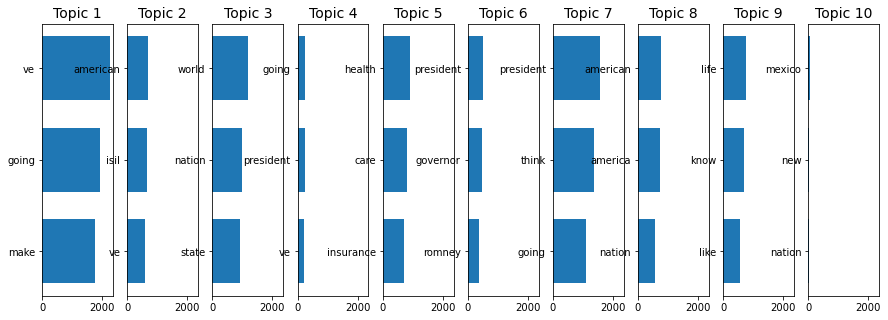

In [140]:
n_top_words = 3
fig, axes = plt.subplots(1, 10, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)